In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing our main dataframe
df=pd.read_csv("sui.csv")
df['country'] = df['country'].str.replace(' ', '')

In [3]:
#formatting the names of the columns 
df.columns = [col.capitalize() for col in df.columns]
df['Country'] = df['Country'].str.replace(' ', '')

In [4]:
#we filter the dataframes to get just the data from the countries we are interested in.
paises_selecc = ["UnitedKingdom","Serbia","BosniaandHerzegovina","Albania","Germany", 'Belgium', 'Croatia', 'Denmark', 'Spain', 'France', 'Ireland', 'Latvia', 'Luxembourg', 'Netherlands', 'Sweden', 'Bulgaria', 'Slovakia', 'Estonia', 'Greece', 'Malta', 'Poland', 'CzechRepublic', 'Austria', 'Cyprus', 'Slovenia', 'Finland', 'Hungary', 'Italy', 'Lithuania', 'Portugal', 'Romania', 'Norway', 'Switzerland']
df_filtrado = df[df['Country'].isin(paises_selecc)]
df_filtrado["Country"].unique()

array(['Albania', 'Austria', 'Belgium', 'BosniaandHerzegovina',
       'Bulgaria', 'Croatia', 'Cyprus', 'CzechRepublic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'UnitedKingdom'], dtype=object)

In [5]:
#filtering and grouping by country to get the total of suicides in each country
df_country_year_sortedby=df_filtrado.groupby(["Country"])["Suicides_no"].sum()
#We will use this data just to have an idea of the top5 and the bottom5 in suicides number.
df_country_year_sortedby=df_country_year_sortedby.sort_values(ascending=False)


In [6]:
#We will use this data just to have an idea of the top5 and the bottom5 in suicides number.
df_country_year_sortedby

Country
France                  329127
Germany                 291262
Poland                  139098
UnitedKingdom           136805
Italy                   132060
Spain                   100202
Hungary                  73891
Romania                  72777
Belgium                  62761
Netherlands              50833
Austria                  50073
CzechRepublic            43687
Sweden                   37795
Bulgaria                 36388
Finland                  33677
Lithuania                28039
Switzerland              26217
Serbia                   24179
Portugal                 24061
Croatia                  18429
Norway                   16992
Denmark                  15297
Slovakia                 13437
Latvia                   12770
Ireland                  12574
Greece                   12368
Slovenia                 10615
Estonia                   7034
Albania                   1970
Luxembourg                1958
Malta                      585
Cyprus                     412


In [7]:
#we are using Tableu for this purpose, but this will be the way to create the plot to see the evolution of these 10 countries filtered previously.
import matplotlib.pyplot as plt
df1=df_filtrado.groupby(["Country","Year"])["Suicides_no"].sum().sort_values(ascending=False)
df1

Country   Year
Germany   1991    14010
          1990    13924
          1992    13458
          1995    12888
          1994    12718
                  ...  
Albania   2005        0
Slovakia  2006        0
Albania   2009        0
          2006        0
Slovakia  2007        0
Name: Suicides_no, Length: 847, dtype: int64

In [8]:
#Like this we will create a dict to filter the countries we want just selecting the data we want from them
dataframes_by_country = {}
for group, data in df1.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")
    

In [9]:
dataframes_by_country

{'Albania':     Country  Year  Suicides_no
 13  Albania  1987           73
 15  Albania  1988           63
 14  Albania  1989           68
 18  Albania  1992           47
 12  Albania  1993           73
 17  Albania  1994           50
 11  Albania  1995           88
 10  Albania  1996           89
 0   Albania  1997          170
 2   Albania  1998          154
 4   Albania  1999          139
 16  Albania  2000           54
 8   Albania  2001          119
 5   Albania  2002          133
 7   Albania  2003          124
 3   Albania  2004          146
 19  Albania  2005            0
 21  Albania  2006            0
 6   Albania  2007          124
 1   Albania  2008          160
 20  Albania  2009            0
 9   Albania  2010           96,
 'Austria':     Country  Year  Suicides_no
 1   Austria  1985         2091
 0   Austria  1986         2139
 2   Austria  1987         2069
 4   Austria  1988         1851
 3   Austria  1989         1898
 5   Austria  1990         1825
 9   Austria  199

In [10]:
#From the previuos dict we create another one applying the filter of the selected countries(top5+bottom5)
selected_countries = ["France","Germany","UnitedKingdom","Italy","Poland","Cyprus","Malta","Luxembourg","BosniaandHerzegovina","Albania"]

nuevo_dataframes_by_country = {}

for country in dataframes_by_country.keys():
    if country in selected_countries:
        nuevo_dataframes_by_country[country] = dataframes_by_country[country]
    

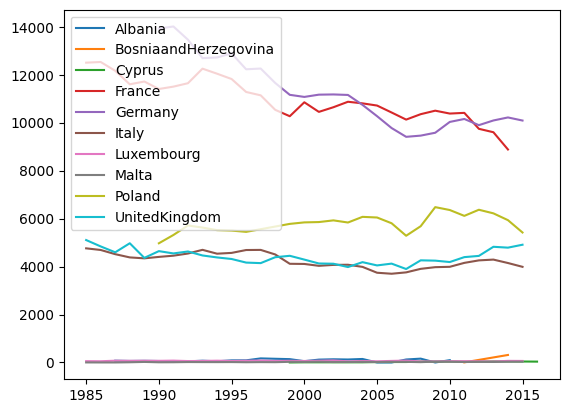

In [11]:
for country in nuevo_dataframes_by_country.keys():
    plt.plot(dataframes_by_country[country]["Year"], dataframes_by_country[country]["Suicides_no"],label=country)
plt.legend()
plt.show()

In [12]:
#now, we will do the same with the ratio, to see of the countries are the same ones.
df_country_year_sortedbypop=df_filtrado.groupby(["Country"])["Suicides/100k_pop"].mean()
df_country_year_sortedbypop=df_country_year_sortedbypop.sort_values()

In [13]:
df_country_year_sortedbypop

Country
Cyprus                   3.293596
Albania                  3.502879
Greece                   4.064839
BosniaandHerzegovina     4.617083
Malta                    5.032285
UnitedKingdom            7.502473
Italy                    8.518468
Spain                    9.432957
Netherlands             10.645340
Ireland                 10.782583
Portugal                11.337531
Romania                 12.489671
Slovakia                12.568788
Norway                  12.941000
Denmark                 14.097159
Sweden                  14.658436
Poland                  15.269514
Germany                 15.559904
Luxembourg              16.549892
CzechRepublic           18.487547
Switzerland             19.024087
Bulgaria                19.489111
Belgium                 21.237903
France                  21.675694
Serbia                  22.164120
Finland                 22.770431
Croatia                 22.835267
Austria                 23.759764
Estonia                 27.276905
Sloven

In [14]:
#this will be the dict with the countries and the ifnroamtion we want from them. Soon, we will discover that there is a way much easier to do this :)
dataframes_by_country_ratio = {}
for group, data in df_country_year_sortedbypop.groupby(level='Country'):
    dataframes_by_country_ratio[group] = pd.DataFrame(data).reset_index().sort_values(by="Suicides/100k_pop")
    

selected_countries = ["Lithuania","Hungary","Estonia","Slovenia","Latvia"]

nuevo_dataframes_para_ratio = {}

for country in dataframes_by_country_ratio.keys():
    if country in selected_countries:
        nuevo_dataframes_para_ratio[country] = dataframes_by_country_ratio[country]
        
nuevo_dataframes_para_ratio

{'Estonia':    Country  Suicides/100k_pop
 0  Estonia          27.276905,
 'Hungary':    Country  Suicides/100k_pop
 0  Hungary          32.761516,
 'Latvia':   Country  Suicides/100k_pop
 0  Latvia          29.259325,
 'Lithuania':      Country  Suicides/100k_pop
 0  Lithuania          40.415573,
 'Slovenia':     Country  Suicides/100k_pop
 0  Slovenia          27.827857}

In [15]:
dataframes_by_country = {}
for group, data in df1.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")


In [16]:
dataframes_by_country

{'Albania':     Country  Year  Suicides_no
 13  Albania  1987           73
 15  Albania  1988           63
 14  Albania  1989           68
 18  Albania  1992           47
 12  Albania  1993           73
 17  Albania  1994           50
 11  Albania  1995           88
 10  Albania  1996           89
 0   Albania  1997          170
 2   Albania  1998          154
 4   Albania  1999          139
 16  Albania  2000           54
 8   Albania  2001          119
 5   Albania  2002          133
 7   Albania  2003          124
 3   Albania  2004          146
 19  Albania  2005            0
 21  Albania  2006            0
 6   Albania  2007          124
 1   Albania  2008          160
 20  Albania  2009            0
 9   Albania  2010           96,
 'Austria':     Country  Year  Suicides_no
 1   Austria  1985         2091
 0   Austria  1986         2139
 2   Austria  1987         2069
 4   Austria  1988         1851
 3   Austria  1989         1898
 5   Austria  1990         1825
 9   Austria  199

In [17]:
#these will be the top5 and the bottom5 in ratio.
df_basta=df_filtrado.groupby(["Country","Year"])["Suicides/100k_pop"].mean().sort_values(ascending=False)
df_basta

Country    Year
Lithuania  1995    53.275000
           1996    49.634167
Hungary    1991    47.916667
Lithuania  2000    47.650000
Hungary    1992    47.521667
                     ...    
Albania    2005     0.000000
Slovakia   2006     0.000000
Albania    2009     0.000000
           2006     0.000000
Slovakia   2007     0.000000
Name: Suicides/100k_pop, Length: 847, dtype: float64

In [20]:
dataframes_by_country2 = {}
for group, data in df_basta.groupby(level='Country'):
    dataframes_by_country2[group] = pd.DataFrame(data).reset_index().sort_values(by="Year")
dataframes_by_country2

{'Albania':     Country  Year  Suicides/100k_pop
 16  Albania  1987           2.654167
 14  Albania  1988           2.705000
 12  Albania  1989           2.783333
 18  Albania  1992           1.500000
 13  Albania  1993           2.713333
 15  Albania  1994           2.681667
 11  Albania  1995           3.379167
 9   Albania  1996           3.635000
 0   Albania  1997           6.452500
 3   Albania  1998           5.543333
 2   Albania  1999           5.817500
 17  Albania  2000           2.558333
 8   Albania  2001           4.218333
 6   Albania  2002           5.209167
 7   Albania  2003           4.883333
 5   Albania  2004           5.449167
 19  Albania  2005           0.000000
 21  Albania  2006           0.000000
 4   Albania  2007           5.487500
 1   Albania  2008           5.920833
 20  Albania  2009           0.000000
 10  Albania  2010           3.471667,
 'Austria':     Country  Year  Suicides/100k_pop
 2   Austria  1985          32.067500
 1   Austria  1986         

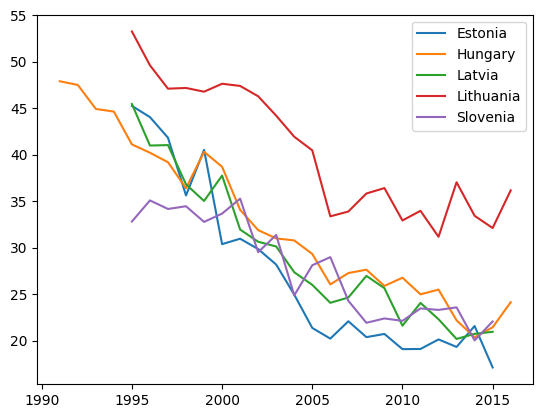

In [21]:
for country in nuevo_dataframes_para_ratio.keys():
    plt.plot(dataframes_by_country2[country]["Year"], dataframes_by_country2[country]["Suicides/100k_pop"],label=country)
plt.legend()

In [22]:
#We start with the age factor. grouping by country as there are several years and we want to have every age group for each country
#we will calculate the mean of ratio for each group to analyze how these have changed during the past years
edades=df_filtrado.groupby(["Country","Age"])["Suicides/100k_pop"].mean()

In [23]:
edades = edades.to_frame()
edades

Suicides/100k_pop
Country       Age                           
Albania       15-24 years           4.513182
              25-34 years           4.275455
              35-54 years           3.641136
              5-14 years            0.433864
              55-74 years           3.094773
...                                      ...
UnitedKingdom 25-34 years           9.807097
              35-54 years          10.891774
              5-14 years            0.106129
              55-74 years           8.503387
              75+ years             9.772581

[198 rows x 1 columns]

In [ ]:
selected_countries3 = ["Lithuania","Hungary","Latvia","Finland","Belgium"]

dataframes_by_country3 = {}
for group, data in edades.groupby(level='Country'):
    dataframes_by_country3[group] = pd.DataFrame(data).reset_index().sort_values(by="Age")

nuevo_dataframe_by_country4={}
for country in dataframes_by_country3.keys():
    if country in selected_countries3:
        nuevo_dataframe_by_country4[country] = dataframes_by_country3[country]

In [ ]:
nuevo_dataframe_by_country4

{'Belgium':    Country          Age  Suicides/100k_pop
 0  Belgium  15-24 years          10.824677
 1  Belgium  25-34 years          18.845645
 2  Belgium  35-54 years          27.137419
 3  Belgium   5-14 years           0.564194
 4  Belgium  55-74 years          26.605484
 5  Belgium    75+ years          43.450000,
 'Finland':    Country          Age  Suicides/100k_pop
 0  Finland  15-24 years          19.912414
 1  Finland  25-34 years          27.125862
 2  Finland  35-54 years          32.043276
 3  Finland   5-14 years           0.518621
 4  Finland  55-74 years          27.831724
 5  Finland    75+ years          29.190690,
 'Hungary':    Country          Age  Suicides/100k_pop
 0  Hungary  15-24 years           9.540000
 1  Hungary  25-34 years          18.908462
 2  Hungary  35-54 years          40.635000
 3  Hungary   5-14 years           0.490000
 4  Hungary  55-74 years          44.080962
 5  Hungary    75+ years          81.673462,
 'Latvia':   Country          Age  Suici

In [ ]:
#filtered dataframe with all the countries where you can see the sum of the ratios puttng sex and ages all together to have the tptales per country
df3=df_filtrado.groupby(["Country","Sex"])["Suicides/100k_pop"].mean()

In [ ]:
paises_seleccionados = df3.loc[["Lithuania","Hungary","Latvia","Slovenia","Estonia"]]

In [ ]:
#this is the filtered dataframe that will be our base to create our graphic in Tableau
paises_seleccionados

Country    Sex   
Lithuania  female    12.874198
           male      67.956947
Hungary    female    14.103677
           male      51.419355
Latvia     female     9.742778
           male      48.775873
Slovenia   female    10.481508
           male      45.174206
Estonia    female     9.496825
           male      45.056984
Name: Suicides/100k_pop, dtype: float64

In [40]:
df4=df_filtrado.groupby(["Country","Gdp_per_capita($)"])["Suicides/100k_pop"].mean()
df4=df4.to_frame()
df4

Suicides/100k_pop
Country       Gdp_per_capita($)                   
Albania       251                         1.500000
              437                         2.713333
              697                         2.681667
              769                         2.705000
              793                         6.452500
...                                            ...
UnitedKingdom 47163                       6.514167
              47240                       7.228333
              49906                       6.994167
              50111                       6.725833
              53576                       6.243333

[846 rows x 1 columns]

In [38]:
#correlaction between gdp per capita,and the ratio. We can conclude that there is a minimum negative correlation. The wealthier you are
#less likely you will commit suicide. However, this correlation is not significant.
corr_mat=df_filtrado["Suicides/100k_pop"].corr(df_filtrado["Gdp_per_capita($)"])
corr_mat

-0.09017579136410211

In [25]:
#funcion para crear una columna donde se sustituya male por 1 y female por 0.
def num_gen(cell):
    if cell == "male":
        return 1
    if cell == "female":
        return 0

In [26]:
#correlation between the gender and the ratio of suicides. Not sigfificant because in every country the numbers are very different fro each other. 
#nevertheless, we can see a moderate positive correlation.
df_filtrado['num_gen_column'] = df_filtrado['Sex'].apply(num_gen)
df_filtrado["Suicides/100k_pop"].corr(df_filtrado["num_gen_column"])

C:\Users\loren\AppData\Local\Temp\ipykernel_195620\4086996283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['num_gen_column'] = df_filtrado['Sex'].apply(num_gen)


0.44130584951776375

In [27]:
df_filtrado

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k_pop,Country-year,Hdi_for_year,Gdp_for_year($),Gdp_per_capita($),Generation,num_gen_column
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26843,UnitedKingdom,2015,female,25-34 years,181,4414464,4.10,United Kingdom2015,NaN,"2,885,570,309,161",47240,Millenials,0
26844,UnitedKingdom,2015,female,75+ years,108,3070457,3.52,United Kingdom2015,NaN,"2,885,570,309,161",47240,Silent,0
26845,UnitedKingdom,2015,female,15-24 years,104,3966564,2.62,United Kingdom2015,NaN,"2,885,570,309,161",47240,Millenials,0
26846,UnitedKingdom,2015,female,5-14 years,6,3663221,0.16,United Kingdom2015,NaN,"2,885,570,309,161",47240,Generation Z,0


In [68]:
#we take the HDI information and group the years and countries to see how the ratio behaves in relation to this index.
df_hdi = df_filtrado.groupby(["Country"]).agg({"Suicides/100k_pop": "mean", "Hdi_for_year": "mean"}).reset_index()
df_hdi.sort_values(by="Suicides/100k_pop",ascending=False)


,Country,Suicides/100k_pop,Hdi_for_year
18,Lithuania,40.415573,0.803500
14,Hungary,32.761516,0.803875
17,Latvia,29.259325,0.784250
28,Slovenia,27.827857,0.856500
9,Estonia,27.276905,0.823125
...,...,...,...
20,Malta,5.032285,0.790300
3,BosniaandHerzegovina,4.617083,0.728500
13,Greece,4.064839,0.824800
0,Albania,3.502879,0.673000


In [76]:
pd.set_option('display.max_rows', 10)
weather=df_filtrado.groupby(["Country"])["Suicides/100k_pop"].mean()
df_weather=weather.to_frame()
df_weather['sunny'] = [2544,1500,1446,1769,2035,1800,3425,1600,1750,1400,1600,1700,1625,2800,1400,1420,2820,1757,1488,1630,2957,1600,1668,1600,2788,2100,2112,2142,1700,2700,1820,1566,1400]
df_weather

,Suicides/100k_pop,sunny
Country,,
Albania,3.502879,2544
Austria,23.759764,1500
Belgium,21.237903,1446
BosniaandHerzegovina,4.617083,1769
Bulgaria,19.489111,2035
...,...,...
Slovenia,27.827857,1700
Spain,9.432957,2700
Sweden,14.658436,1820


In [77]:
#this is the correlation bewtween ratio and sunnny days. negative becuase the less sunny days the more likely the ratio of suicides in the country will be higher
corre=df_weather["Suicides/100k_pop"].corr(df_weather["sunny"])
corre

-0.6046716171434509

In [78]:
df_temp=pd.read_csv("temp_average.csv")
df_temp["Country"] = df_temp["Country"].str.replace(" ", "").str.strip()


In [79]:
paises_selecc2 = ["UnitedKingdom","Serbia","BosniaandHerzegovina","Albania","Germany", 'Belgium', 'Croatia',"Cyprus", 'Denmark', 'Spain', 'France', 'Ireland', 'Latvia', 'Luxembourg', 'Netherlands', 'Sweden', 'Bulgaria', 'Slovakia', 'Estonia', 'Greece', 'Malta', 'Poland', 'CzechRepublic', 'Austria', 'Cyprus', 'Slovenia', 'Finland', 'Hungary', 'Italy', 'Lithuania', 'Portugal', 'Romania', 'Norway', 'Switzerland']

df_temp['Country'] = df_temp['Country'].str.replace(' ', '')
df_temp["Country"] = df_temp["Country"].str.replace(" ", "").str.strip()
df_temp = df_temp[df_temp['Country'].isin(paises_selecc2)]


In [80]:
#we put the two dataframes together(temerature and sunny hours)
merged_df = df_weather.merge(df_temp, on="Country")
merged_df


,Country,Suicides/100k_pop,sunny,temp_average
0,Albania,3.502879,2544,15.0
1,Austria,23.759764,1500,11.0
2,Belgium,21.237903,1446,10.5
3,BosniaandHerzegovina,4.617083,1769,10.0
4,Bulgaria,19.489111,2035,10.0
...,...,...,...,...
28,Slovenia,27.827857,1700,10.5
29,Spain,9.432957,2700,15.0
30,Sweden,14.658436,1820,7.0
31,Switzerland,19.024087,1566,9.5


In [82]:
#there is a correlation, but it´s not as strong as we thought it will be
merged_df["Suicides/100k_pop"].corr(merged_df["temp_average"])

-0.5479214835491051

These two correlation seem to be not string enough as we thought, but then we analyze each country and compare ratio and sunny hours/temp, and the correlation is much more clear than when you compare all the countries at the same time.

C:\Users\loren\AppData\Local\Temp\ipykernel_175636\1795153976.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(merged_df['Country'], rotation=45, ha='right')  # Ajustar ángulo y alineación


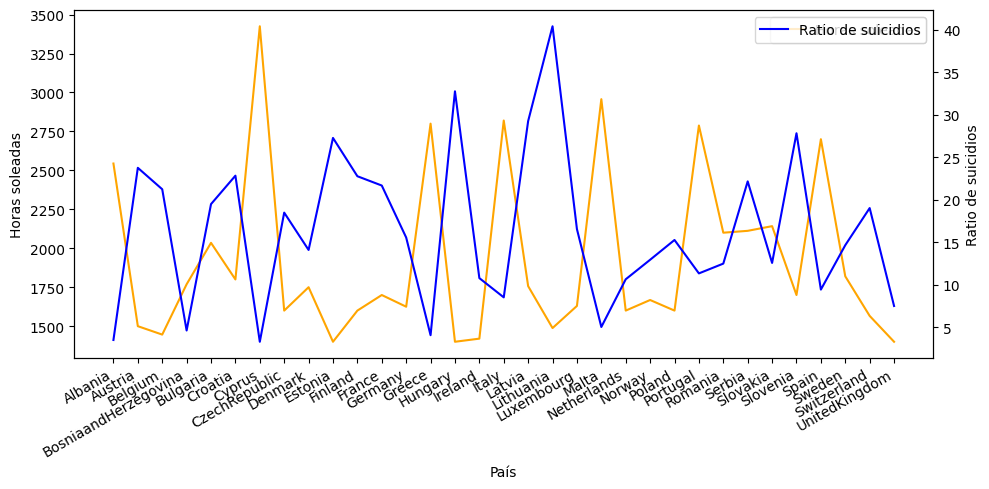

In [83]:
#this will be the plot to visualize the correlation between sunny hours and suicidio ratio in each country.
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(merged_df['Country'], merged_df['sunny'], color='orange', label='Horas soleadas')
ax1.set_xlabel('País')
ax1.set_ylabel('Horas soleadas')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(merged_df['Country'], merged_df['Suicides/100k_pop'], color='blue', label='Ratio de suicidios')
ax2.set_ylabel('Ratio de suicidios')
ax2.legend()
ax1.set_xticklabels(merged_df['Country'], rotation=45, ha='right')  # Ajustar ángulo y alineación
fig.autofmt_xdate()
plt.tight_layout()
plt.show()